In [1]:
#This is code for object detection by YOLOV3
#This code is developed by HOssein ZOLFAGHARI
import cv2
import numpy as np

# Load YOLOv3 configuration files and weights
net = cv2.dnn.readNet("/home/hossein/darknet/cfg/yolov3.cfg", "/home/hossein/darknet/yolov3.weights")
classes = []
with open("/home/hossein/darknet/data/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

In [16]:
# Load the image
image = "/home/hossein/darknet/data/person.jpg"
img = cv2.imread(image)

# Get the image dimensions
height, width, _ = img.shape

# Create a blob from the image
blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), swapRB=True, crop=False)

# Set the input to the YOLOv3 network
net.setInput(blob)

# Run the forward pass through the network
output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

# Initialize lists to store the detected objects' bounding boxes, confidences, and class IDs
boxes = []
confidences = []
class_ids = []

# Loop over each output layer
for output in layerOutputs:
    # Loop over each detection in the output layer
    for detection in output:
        # Get the class ID and confidence score for the detected object
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        # Check if the detected object's confidence score is greater than the threshold
        if confidence > 0.5:
            # Get the coordinates of the bounding box for the detected object
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w/2)
            y = int(center_y - h/2)

            # Add the bounding box, confidence score, and class ID to their respective lists
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Apply non-maximum suppression to eliminate overlapping bounding boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Initialize lists to store the final detected objects' bounding boxes, confidences, and class IDs
final_boxes = []
final_confidences = []
final_class_ids = []

# Loop over the indices of the remaining bounding boxes after non-maximum suppression
for i in indices.flatten():
    # Add the final bounding box, confidence score, and class ID to their respective lists
    final_boxes.append(boxes[i])
    final_confidences.append(confidences[i])
    final_class_ids.append(class_ids[i])

# Draw the final bounding boxes and class labels on the image
colors = np.random.uniform(0, 255, size=(len(classes), 3))  
for i in range(len(final_boxes)):
    x, y, w, h = final_boxes[i]
    label = str(classes[final_class_ids[i]])
    color = colors[final_class_ids[i]]
    cv2.rectangle(img, (x, y), (x+w, y+h), color, 2)
    text = "{}: {:.4f}".format(classes[class_ids[i]], confidences[i])
    cv2.putText(img, text, (x, y-5), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)


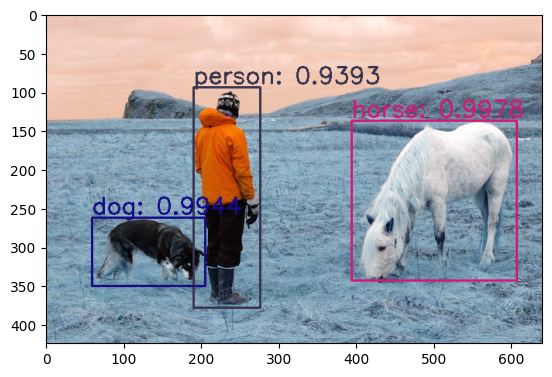

In [17]:
import matplotlib.pyplot as plt
plt.imshow(img)

In [148]:
cv2.imwrite("img_2.jpg", img)

True